## 인공지능 분류 (2 Types)

- regression = continuous 값(x값)에서 → continuous 값(y값)을 내는 것 (숫자에서 숫자로 가는 것) = linear 하게 가는 것

- classification = continuous 에서 → discrete 하고 categorical = non-linearity (sigmoid사용) 

맨마지막에 activation해서 sigmoid 붙여주는게 non linearity 만들어주는 것

→ classification 중에서 sigmoid는 그냥 어느범위부터 어디까지는 0 나머지는 1로 가게 하는 방식인것

데이터 보고 regression쓸지 classification쓸지 파악할 수 있어야

예시) x값이 교통량 y값이 집값 → 둘간의 co relation을 보면 된다 / plotting 사용

보스턴 집값에 대해 확장생각 적용응용

## 사용할 데이터 set - 어떻게 쓰이는지에 대한 이해 (기본내용)
- sound 빼고 "이미지"와 "텍스트"로 이루어진 데이터 세트

Modules (https://www.tensorflow.org/api_docs/python/tf/keras/datasets)
- boston_housing module: Boston housing price regression dataset.
- cifar10 module: CIFAR10 small images classification dataset.
- cifar100 module: CIFAR100 small images classification dataset. 
- → 이미지 깨지는거 보면 그게 각각 다른 숫자로 이루어져 있음을 알 수 있. ex) 50 * 50 등
- → 숫자가 소리로 표현 되듯이 그림도 숫자로 표현될 수 있. 
- ex) 흑백이면 100*100 이 총 만개 맞는데 칼라는 거기에 3층을 곱해주어야 해서 총 3만개


- fashion_mnist module: Fashion-MNIST dataset.
- →여기 이미지들도 흑백에 해당 됨 (RGB 중에 한층만 있는 것 - 밝은 색이면 1이고 어두운 색이면 0)


- imdb module: IMDB sentiment classification dataset.
- → 영화 관련된 데이터 베이스(세계 모든 영화) 
- → 사람들 영화평 리뷰(텍스트)가 x값, 좋다/나쁘다 구분이 y값 = 즉 입력은 텍스트인데 출력은 좋다/나쁘다/모르다 등으로 한정 
- => classification으로 쓴 것임. 왜냐 딱딱 점수로 80점 이렇게 주는 게 아니라서

- mnist module: MNIST handwritten digits dataset.
- → 숫자 필기체 관련 모든 이미지 데이터 모음 (흑백) 
- => digit classification 임

- reuters module: Reuters topic classification dataset.
- → 로이터 통신 기사의 분야 분류 (정치인지 사회인지 등등) 
- → classification 사용해서 삼성주식을 지금 살지 말지 추천하는

# import modules

- 인공지능 중에 tensorflow 쓰고 그중에서도 keras 사용(tensorflow 잘쓰게 도와주는 도구)
- tensorflow는 python을 기반으로 돈다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- data 속에 x,y 들어가 있는 것


- 엑셀 파일랑 관련된건 pandas
- 행렬 형태로 만들어주는게 numpy
- visualization 가능하게 하는게 plotting 관련 라이브러리 matplotlib

이 세가지가 가장 중요한 모듈 (data science에서) tensorflow는 machine learning 에서 대세

# data preparation and visualization

pd 는 pandas 모듈 사용하는 것

- 총 17개의 point
- x 가 입력, y가 출력
- 패턴 찾기 : 대체로 x증가하면 y도 증가하는 추세 (그래프로 보면 더 명확) 


- plt.plot 전까지가 data preparation / plt.plot이 visualization 하는 부분 → 패턴 찾는거 더 용이하게

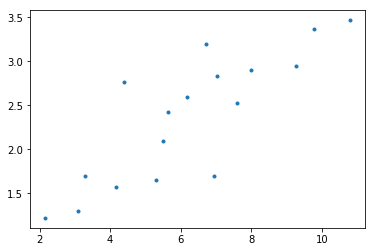

In [2]:
data = pd.read_csv('regression.csv', delimiter = ',')
X = data['X']
Y = data['Y']
plt.plot(X, Y, '.')

# create model
- 인공신경망 만들기

In [2]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.add(Dense(3))
model.add(Dense(6))
model.add(Dense(4))
model.compile(optimizer="rmsprop", loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


warning 나오는 것 일단 무시

- Sequential 함수 : 모델 껍데기 만들기. 갔다가 돌아오는 게 아니라 '한방향'으로만 쓰는 것(sequential말 의미)

- model.add 부터가 진짜 내용 만드는 것
- 다음 dense 모델 적용시키는 것 
- →dense 바로 뒤 숫자가 <출력부>y 값 개수 
- →input_shape 뒤 숫자가 <입력부>x 값 개수 = 0~1까지 니까 두개 
- => 여기까지가 가장 간단한 인공신경망 만드는 방법 "y=ax + b 형태"


- model.compile(optimizer="rmsprop", loss='mse') 이부분 반드시 명시해줘야함
- →optimizer : output과 실제 정답값 간의 차이를 함수행렬을 계속 epoch돌아서 update해주는데 미적분사용해서 바꿔주는데 그런 방식들 중 하나
- →loss=mse : 출력부와 정답값 간의 차이 계산을 어떻게 할것인지 loss정의해주는 여러 방식중 하나


- 중간에 hidden layer 넣어주는 방법 ex) model.add(Dense(3)) → 동그라미=노드 개수 3개

- 맨마지막 dense(4)는 마지막 출력값이어야 하므로 1로 고쳐주어야 왜냐? 처음 dense 바로 뒤 숫자가 1이기 때문 

- non-linerity 는 layer 별로 부여할 수 있으나 모든 layer에 줄 수 있는 건x → 주는 방법 ex) activation = 'sigmoid'

- activation = 'linear' = 아무것도 안한다는 뜻 ∵ 원래 기본값이니까

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.add(Dense(3), activation = 'relu')
model.add(Dense(6), activation = 'tanh'
model.add(Dense(1), activation = 'sigmoid')
model.compile(optimizer="rmsprop", loss='mse')

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.add(Dense(3))
model.add(Dense(6))
model.add(Dense(1))
model.compile(optimizer="rmsprop", loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# train model

In [5]:
model.fit(X, Y, epochs=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
17/17 [==============================] - 1s 58ms/sample - loss: 40.1158
Epoch 2/1000
17/17 [==============================] - 0s 0s/sample - loss: 37.8158
Epoch 3/1000
17/17 [==============================] - 0s 0s/sample - loss: 36.2496
Epoch 4/1000
17/17 [==============================] - 0s 0s/sample - loss: 34.9917
Epoch 5/1000
17/17 [==============================] - 0s 919us/sample - loss: 33.9110
Epoch 6/1000
17/17 [==============================] - 0s 917us/sample - loss: 32.9476
Epoch 7/1000
17/17 [==============================] - 0s 0s/sample - loss: 32.0690
Epoch 8/1000
17/17 [==============================] - 0s 917us/sample - loss: 31.2550
Epoch 9/1000
17/17 [==============================] - 0s 921us/sample - loss: 30.4925
Epoch 10/1000
17/17 [==============================] - 0s 0s/sample - loss: 29.7720
Epoch 11/1000
17/17 [==============================] - 0s 0s/sample - loss: 29.0866
Epoch 12/1000
17/17 [==

한 epoch(=한번의 예측 도는 것/한바퀴 도는)만 돌아도 loss 값이 확 떨어지는 것 확인
- 계속 수렴해가는 것. 계속하다보면 어느순간 줄어들지 않는 순간이 옴
- loss값을 보면서 기계가 계속 학습해나가는지 확인할 수 있는 것

# model prediction
- 실제로 훈련이 잘 됐는지 확인해보는


- 파란색 • 이 실제 데이터 / 주황색 x가 prediction모델 써서 새로 만들어본 데이터
- 둘의 비교 통해서 인공신경망이 얼마나 잘 만들어졌는지 확인할 수 있
- 따라서 실제 데이터가 없더라고 이 새로 만든 model만 갖고서 입력값만 넣으면 언제든지 예측할 수 있는 system 만들 수 있는 것

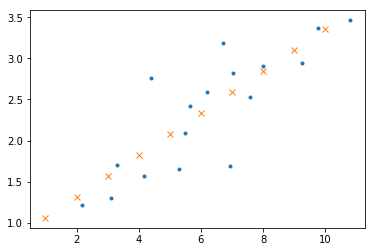

In [6]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = model.predict(x)
plt.plot(X, Y, '.')
plt.plot(x,y, 'x')
plt.show()

# what are a and b in y = ax + b?

궁금해서 확인해보고 싶을 때 (실제 a,b값)

여기선 화살표 두개

첨에 나온게 a 값이고 두번째가 b값

In [7]:
weights = model.layers[0].get_weights()
print(weights)

[array([[0.5429764]], dtype=float32), array([-0.00764829], dtype=float32)]


→가장 간단한 form만들었기에 즉 하나의 layer만 만들었기에 '0' 넣어주는 것

그림자료에 대한 필기 (패드 필기)
- 추정해야 하는 값은 a,b / a,b,c 
- 입력개수는 화살표 개수 - 출력 개수는 하나(y의 개수)
- 인공신경만이란 것은 결국 함수

## 여기서부터 보스턴 하우징 

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=[13]))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 1s 1ms/sample - loss: 148230.9069
Epoch 2/1000
404/404 [==============================] - 0s 77us/sample - loss: 137138.2560
Epoch 3/1000
404/404 [==============================] - 0s 116us/sample - loss: 128295.6979
Epoch 4/1000
404/404 [==============================] - 0s 116us/sample - loss: 120023.2270
Epoch 5/1000
404/404 [==============================] - 0s 116us/sample - loss: 112065.3851
Epoch 6/1000
404/404 [==============================] - 0s 77us/sample - loss: 104384.1713
Epoch 7/1000
404/404 [==============================] - 0s 116us/sample - loss: 97024.0141
Epoch 8/1000
404/404 [==============================] - 0s 116us/sample - loss: 89907.5184
Epoch 9/1000
404/404 [==============================] - 0s 193us/sample - loss: 83051.4251
Epoch 10/1000
404/404 [==============================] - 0s 155us/sample - loss: 76487.9074
Epoch 11/1000
404/404 [==============================] - 0s 111us/sample - loss: 70224.

- fit 이라는 것은 훈련한다는 말
- fit에선 train 데이터 쓰고 / evaluate할때는 test 데이터 씀
- fit에선 variable 네개 중에 train에 해당하는 두개 가져온 것
- epoch=1은 전제 데이터 한 번 돌리는 것 1000으로 하면 홀데이터를 천번을 사용하는 것

In [13]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 2ms/sample - loss: 30.5665


30.566502739401425

위에 값이랑 비슷하게 결과 나올 것임

In [ ]:
model.predict

<결국 tensorflow에서 중요한 함수 세가지> - fit/ evaluate/ predict
- model.fit = train 
- model.evaluate = test -> 훈련에 썼던 데이터 말고 새로운 데이터로 진짜 test 해보는 것 (상품화 하기 이전까지 단계)
- model.predict = inference-> 마지막으로 상품화 하기 위해 

성능을 올리는게 중요한 것(튜닝으로 100퍼센트로 가까이 가는 것)